# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: Hierarchical Clustering for Deduplication

**Steps**:
1. Data Set: Obtain a dataset containing duplicate employee information.
2. Perform Clustering: Use hierarchical agglomerative clustering to cluster the employee
records.
3. Evaluate Duplicates: Determine duplicates by analyzing the clusters formed.
4. Clean Data: Remove duplicate employee records found during clustering.

/tmp/ipykernel_24883/841776457.py:39: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='average')


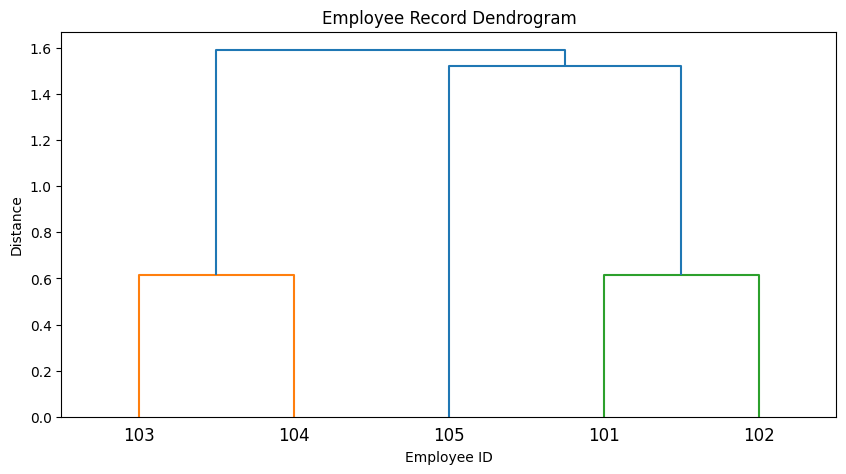

Potential Duplicate Groups:
    employee_id            name   department  cluster
2          103       Bob Smith        Sales        1
3          104    Robert Smith        Sales        2
0          101   Alice Johnson  Engineering        3
1          102  Alicia Johnson  Engineering        4
4          105   Charlie Davis           HR        5

Cleaned Dataset:
    employee_id            name   department
0          101   Alice Johnson  Engineering
1          102  Alicia Johnson  Engineering
2          103       Bob Smith        Sales
3          104    Robert Smith        Sales
4          105   Charlie Davis           HR


In [2]:
# write your code from here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# 1. Sample employee dataset with duplicates
data = {
    "employee_id": [101, 102, 103, 104, 105],
    "name": [
        "Alice Johnson",
        "Alicia Johnson",
        "Bob Smith",
        "Robert Smith",
        "Charlie Davis"
    ],
    "department": [
        "Engineering",
        "Engineering",
        "Sales",
        "Sales",
        "HR"
    ]
}
df = pd.DataFrame(data)

# Combine fields for deduplication
df["text"] = df["name"] + " " + df["department"]

# Convert to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["text"])

# Compute cosine distance matrix
distance_matrix = cosine_distances(X)

# 2. Perform Hierarchical Agglomerative Clustering
linked = linkage(distance_matrix, method='average')

# 3. Plot dendrogram (optional for visual inspection)
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=df["employee_id"].values)
plt.title("Employee Record Dendrogram")
plt.xlabel("Employee ID")
plt.ylabel("Distance")
plt.show()

# Assign cluster labels (threshold controls sensitivity)
df["cluster"] = fcluster(linked, t=0.6, criterion='distance')

# 4. Print grouped potential duplicates and remove one per group
duplicates = df.sort_values("cluster")[["employee_id", "name", "department", "cluster"]]
print("Potential Duplicate Groups:\n", duplicates)

# Remove duplicates (keep first in each cluster)
clean_df = df.drop_duplicates(subset="cluster", keep="first").drop(columns=["text", "cluster"])
print("\nCleaned Dataset:\n", clean_df)
#